In [11]:
# Cell 1 - Fixed Data Loading with Header Skipping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("XO Project - Exoplanet Habitability Classifier")
print("="*60)

# First, let's find where the actual data starts
with open('../data/raw/exoplanet_data.csv', 'r') as f:
    lines = f.readlines()

# Find the header line (should contain column names like pl_name, hostname, etc.)
header_line_index = None
for i, line in enumerate(lines):
    if 'pl_name' in line and not line.strip().startswith('#'):
        header_line_index = i
        print(f"Found header at line {i + 1}: {line.strip()[:100]}...")
        break

if header_line_index is not None:
    # Load data starting from the header line
    try:
        df = pd.read_csv('../data/raw/exoplanet_data.csv',
                         skiprows=header_line_index,  # Skip to header
                         sep=',',
                         on_bad_lines='skip',
                         low_memory=False)
        
        print(f"Dataset loaded successfully!")
        print(f"Shape: {df.shape[0]} exoplanets, {df.shape[1]} features")
        
    except Exception as e:
        print(f"Loading failed: {e}")
else:
    print("Could not find header line with 'pl_name'")
    print("First 10 lines of file:")
    for i, line in enumerate(lines[:10]):
        print(f"Line {i+1}: {line.strip()[:100]}...")

# Display results
if 'df' in locals() and hasattr(df, 'columns') and len(df.columns) > 1:
    print(f"\nDataset Info:")
    print(f"Columns: {len(df.columns)}")
    print(f"Rows: {len(df)}")
    
    print("\nFirst 10 column names:")
    for i, col in enumerate(df.columns[:10]):
        print(f"  {i+1:2d}. {col}")
    
    if len(df.columns) > 10:
        print(f"     ... and {len(df.columns) - 10} more columns")
    
    print("\nFirst 3 rows:")
    display(df.head(3))
    
    # Check for key exoplanet features
    key_features = ['pl_name', 'hostname', 'pl_rade', 'pl_masse', 'pl_orbsmax', 'st_teff']
    found_features = [col for col in key_features if col in df.columns]
    print(f"\nKey features found: {found_features}")
else:
    print("Still having issues loading the data properly")

XO Project - Exoplanet Habitability Classifier
Found header at line 97: pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_con...
Dataset loaded successfully!
Shape: 38779 exoplanets, 92 features

Dataset Info:
Columns: 92
Rows: 38779

First 10 column names:
   1. pl_name
   2. hostname
   3. default_flag
   4. sy_snum
   5. sy_pnum
   6. discoverymethod
   7. disc_year
   8. disc_facility
   9. soltype
  10. pl_controv_flag
     ... and 82 more columns

First 3 rows:


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14



Key features found: ['pl_name', 'hostname', 'pl_rade', 'pl_orbsmax', 'st_teff']


In [12]:
# Cell 2 - Dataset Overview and Key Statistics
print("Dataset Overview:")
print("="*50)
print(f"Total confirmed exoplanets: {len(df):,}")
print(f"Total features per planet: {len(df.columns)}")
print(f"Discovery date range: {df['disc_year'].min()} - {df['disc_year'].max()}")

# Check for key habitability features
key_features = {
    'pl_name': 'Planet Name',
    'hostname': 'Host Star Name', 
    'pl_rade': 'Planet Radius (Earth radii)',
    'pl_masse': 'Planet Mass (Earth masses)',
    'pl_orbsmax': 'Orbital Distance (AU)',
    'st_teff': 'Stellar Temperature (K)',
    'pl_eqt': 'Equilibrium Temperature (K)',
    'discoverymethod': 'Discovery Method',
    'disc_year': 'Discovery Year'
}

print("\nKey Features for Habitability Analysis:")
print("="*50)
for feature, description in key_features.items():
    if feature in df.columns:
        non_null = df[feature].count()
        total = len(df)
        completeness = (non_null/total)*100
        print(f"✓ {feature:12} | {description:30} | {completeness:5.1f}% complete")
    else:
        print(f"✗ {feature:12} | {description:30} | Not found")

Dataset Overview:
Total confirmed exoplanets: 38,779
Total features per planet: 92
Discovery date range: 1992 - 2025

Key Features for Habitability Analysis:
✓ pl_name      | Planet Name                    | 100.0% complete
✓ hostname     | Host Star Name                 | 100.0% complete
✓ pl_rade      | Planet Radius (Earth radii)    |  69.1% complete
✗ pl_masse     | Planet Mass (Earth masses)     | Not found
✓ pl_orbsmax   | Orbital Distance (AU)          |  56.2% complete
✓ st_teff      | Stellar Temperature (K)        |  91.4% complete
✓ pl_eqt       | Equilibrium Temperature (K)    |  43.7% complete
✓ discoverymethod | Discovery Method               | 100.0% complete
✓ disc_year    | Discovery Year                 | 100.0% complete


In [13]:
# Cell 3 - Missing Data Analysis
print("Missing Data Analysis:")
print("="*50)

# Calculate missing data for all columns
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(1)

# Show top 15 columns with most missing data
print("Top 15 columns with missing data:")
for i, (col, missing) in enumerate(missing_data.head(15).items()):
    if missing > 0:
        print(f"{i+1:2d}. {col:15} | {missing:6,} missing ({missing_percent[col]:5.1f}%)")

# Focus on key habitability features
key_cols = ['pl_rade', 'pl_masse', 'pl_orbsmax', 'st_teff', 'pl_eqt']
available_key_cols = [col for col in key_cols if col in df.columns]

if available_key_cols:
    print(f"\nMissing data for key habitability features:")
    print("="*50)
    for col in available_key_cols:
        missing = df[col].isnull().sum()
        available = len(df) - missing
        percent_available = (available/len(df))*100
        print(f"{col:12} | {available:6,} available ({percent_available:5.1f}%)")

Missing Data Analysis:
Top 15 columns with missing data:
 1. pl_eqterr1      | 36,432 missing ( 93.9%)
 2. pl_eqterr2      | 36,432 missing ( 93.9%)
 3. st_spectype     | 35,991 missing ( 92.8%)
 4. pl_orbeccenerr2 | 35,168 missing ( 90.7%)
 5. pl_orbeccenerr1 | 35,167 missing ( 90.7%)
 6. pl_bmassjerr2   | 32,636 missing ( 84.2%)
 7. pl_bmassjerr1   | 32,636 missing ( 84.2%)
 8. pl_bmasseerr1   | 32,630 missing ( 84.1%)
 9. pl_bmasseerr2   | 32,630 missing ( 84.1%)
10. pl_bmassjlim    | 32,012 missing ( 82.5%)
11. pl_bmassj       | 32,012 missing ( 82.5%)
12. pl_bmasse       | 32,011 missing ( 82.5%)
13. pl_bmassprov    | 32,011 missing ( 82.5%)
14. pl_bmasselim    | 32,011 missing ( 82.5%)
15. pl_orbsmaxerr2  | 31,470 missing ( 81.2%)

Missing data for key habitability features:
pl_rade      | 26,789 available ( 69.1%)
pl_orbsmax   | 21,779 available ( 56.2%)
st_teff      | 35,435 available ( 91.4%)
pl_eqt       | 16,951 available ( 43.7%)


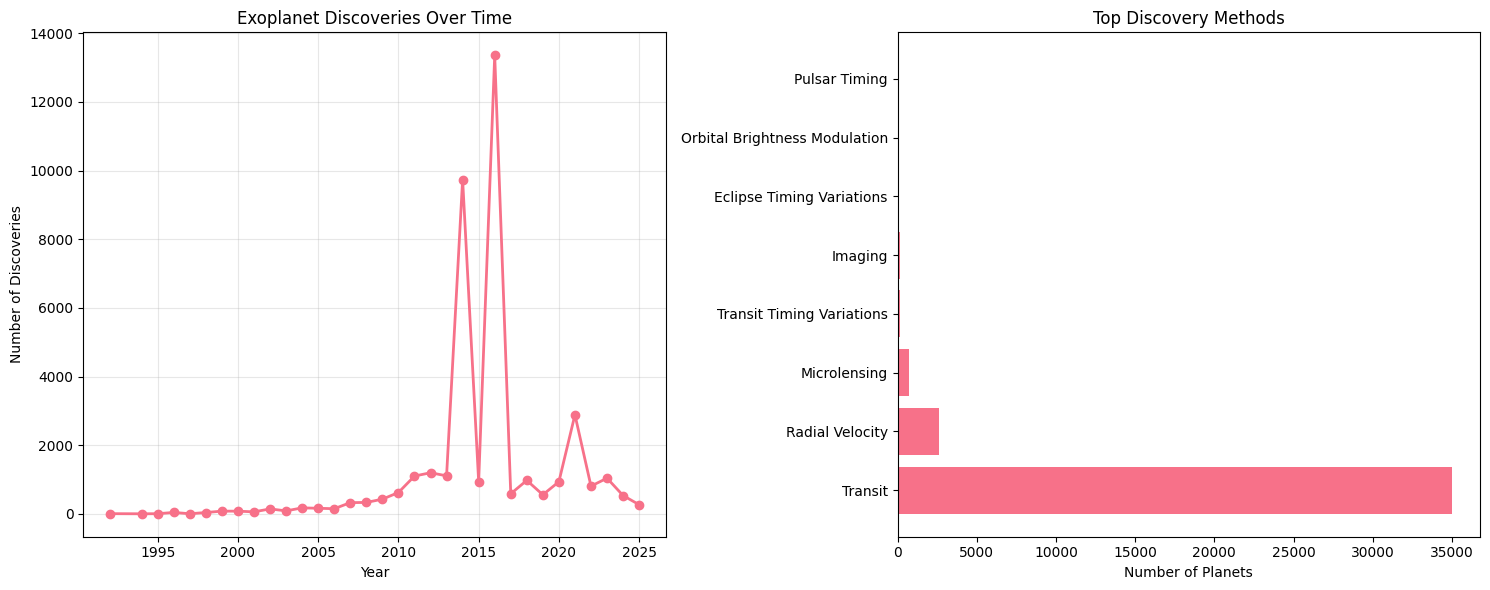

Peak discovery year: 2016 (13360 planets)
Most common discovery method: Transit (35024 planets)


In [14]:
# Cell 4 - Discovery Timeline and Methods
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Discovery timeline
yearly_discoveries = df['disc_year'].value_counts().sort_index()
ax1.plot(yearly_discoveries.index, yearly_discoveries.values, marker='o', linewidth=2)
ax1.set_title('Exoplanet Discoveries Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Discoveries')
ax1.grid(True, alpha=0.3)

# Discovery methods
method_counts = df['discoverymethod'].value_counts().head(8)
ax2.barh(method_counts.index, method_counts.values)
ax2.set_title('Top Discovery Methods')
ax2.set_xlabel('Number of Planets')

plt.tight_layout()
plt.savefig('../visualizations/exploratory/discovery_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Peak discovery year: {yearly_discoveries.idxmax()} ({yearly_discoveries.max()} planets)")
print(f"Most common discovery method: {method_counts.index[0]} ({method_counts.iloc[0]} planets)")

In [15]:
# Cell 5 - Find Alternative Mass and Temperature Columns
print("Searching for alternative habitability features:")
print("="*50)

# Look for mass-related columns
mass_cols = [col for col in df.columns if 'masse' in col.lower() or 'mass' in col.lower()]
print(f"Mass-related columns found: {mass_cols}")

# Look for temperature-related columns
temp_cols = [col for col in df.columns if 'temp' in col.lower() or '_t' in col.lower()]
print(f"Temperature-related columns found: {temp_cols}")

# Check completeness of these alternatives
if mass_cols:
    print("\nMass column completeness:")
    for col in mass_cols[:5]:  # Show first 5
        completeness = (df[col].count() / len(df)) * 100
        print(f"  {col:20} | {completeness:5.1f}% complete")

if temp_cols:
    print("\nTemperature column completeness:")
    for col in temp_cols[:5]:  # Show first 5
        completeness = (df[col].count() / len(df)) * 100
        print(f"  {col:20} | {completeness:5.1f}% complete")

Searching for alternative habitability features:
Mass-related columns found: ['pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim']
Temperature-related columns found: ['st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim']

Mass column completeness:
  pl_bmasse            |  17.5% complete
  pl_bmasseerr1        |  15.9% complete
  pl_bmasseerr2        |  15.9% complete
  pl_bmasselim         |  17.5% complete
  pl_bmassj            |  17.5% complete

Temperature column completeness:
  st_teff              |  91.4% complete
  st_tefferr1          |  89.4% complete
  st_tefferr2          |  88.8% complete
  st_tefflim           |  91.4% complete


In [16]:
# Cell 6 - Comprehensive Feature Discovery
print("Comprehensive search for habitability-related features:")
print("="*60)

# Search patterns for different types of features
search_patterns = {
    'Planet Size': ['rad', 'diam'],
    'Planet Mass': ['mass', 'mp'],
    'Orbital Distance': ['sma', 'orbit', 'au', 'per'],
    'Temperature': ['temp', 'teq', 'teff'],
    'Stellar Properties': ['st_', 'star'],
    'Density': ['dens', 'rho'],
    'Eccentricity': ['ecc'],
    'Host Star': ['host', 'st_']
}

for category, patterns in search_patterns.items():
    print(f"\n{category}:")
    found_cols = []
    for pattern in patterns:
        matches = [col for col in df.columns if pattern.lower() in col.lower()]
        found_cols.extend(matches)
    
    # Remove duplicates and show unique columns
    unique_cols = list(set(found_cols))
    if unique_cols:
        for col in sorted(unique_cols)[:5]:  # Show first 5 matches
            completeness = (df[col].count() / len(df)) * 100
            print(f"  {col:25} | {completeness:5.1f}% complete")
    else:
        print(f"  No columns found")

# Show all column names for reference
print(f"\nAll 92 column names:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Comprehensive search for habitability-related features:

Planet Size:
  pl_rade                   |  69.1% complete
  pl_radeerr1               |  67.2% complete
  pl_radeerr2               |  67.2% complete
  pl_radelim                |  76.2% complete
  pl_radj                   |  69.1% complete

Planet Mass:
  pl_bmasse                 |  17.5% complete
  pl_bmasseerr1             |  15.9% complete
  pl_bmasseerr2             |  15.9% complete
  pl_bmasselim              |  17.5% complete
  pl_bmassj                 |  17.5% complete

Orbital Distance:
  default_flag              | 100.0% complete
  pl_orbper                 |  91.7% complete
  pl_orbpererr1             |  87.4% complete
  pl_orbpererr2             |  87.4% complete
  pl_orbperlim              |  91.7% complete

Temperature:
  st_teff                   |  91.4% complete
  st_tefferr1               |  89.4% complete
  st_tefferr2               |  88.8% complete
  st_tefflim                |  91.4% complete

Stellar 

In [17]:
# Cell 7 - Core Habitability Features Analysis
print("Core Habitability Features Analysis:")
print("="*60)

# Check completeness of key features we found
core_features = {
    'pl_rade': 'Planet Radius (Earth radii)',
    'pl_bmasse': 'Planet Mass (Earth masses)', 
    'pl_orbsmax': 'Orbital Distance (AU)',
    'st_teff': 'Stellar Temperature (K)',
    'pl_eqt': 'Equilibrium Temperature (K)',
    'st_mass': 'Stellar Mass (Solar masses)',
    'pl_orbeccen': 'Orbital Eccentricity'
}

print("Feature completeness:")
for feature, description in core_features.items():
    if feature in df.columns:
        non_null = df[feature].count()
        total = len(df)
        completeness = (non_null/total)*100
        print(f"{feature:12} | {description:35} | {completeness:5.1f}% ({non_null:,} planets)")

# Create a subset with planets that have the minimum required data
min_required_cols = ['pl_rade', 'pl_orbsmax', 'st_teff']
complete_data = df.dropna(subset=min_required_cols)

print(f"\nPlanets with minimum required data (radius, orbital distance, stellar temp):")
print(f"Complete dataset: {len(complete_data):,} planets ({len(complete_data)/len(df)*100:.1f}%)")

# Check basic statistics for key features
print(f"\nBasic Statistics for Core Features:")
print("="*60)
stats_cols = ['pl_rade', 'pl_orbsmax', 'st_teff']
for col in stats_cols:
    if col in df.columns:
        data = df[col].dropna()
        print(f"{col:12} | Min: {data.min():8.2f} | Max: {data.max():8.2f} | Mean: {data.mean():8.2f}")

Core Habitability Features Analysis:
Feature completeness:
pl_rade      | Planet Radius (Earth radii)         |  69.1% (26,789 planets)
pl_bmasse    | Planet Mass (Earth masses)          |  17.5% (6,768 planets)
pl_orbsmax   | Orbital Distance (AU)               |  56.2% (21,779 planets)
st_teff      | Stellar Temperature (K)             |  91.4% (35,435 planets)
pl_eqt       | Equilibrium Temperature (K)         |  43.7% (16,951 planets)
st_mass      | Stellar Mass (Solar masses)         |  84.6% (32,797 planets)
pl_orbeccen  | Orbital Eccentricity                |  47.9% (18,576 planets)

Planets with minimum required data (radius, orbital distance, stellar temp):
Complete dataset: 18,274 planets (47.1%)

Basic Statistics for Core Features:
pl_rade      | Min:     0.27 | Max:  4282.98 | Mean:     5.44
pl_orbsmax   | Min:     0.00 | Max: 19000.00 | Mean:     4.66
st_teff      | Min:   415.00 | Max: 57000.00 | Mean:  5464.41
